<a href="https://colab.research.google.com/github/escaduto/BuildingExtraction/blob/master/setting_up.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive # import drive from google colab
ROOT = "/content/drive"     # default location for the drive
print(ROOT)                 # print content of ROOT (Optional)

drive.mount(ROOT)           # we mount the google drive at /content/drive

/content/drive
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
%cd "/content/drive/My Drive/STA221_FinalProj"
%ls "./Data/FireDataset/train"

/content/drive/.shortcut-targets-by-id/1xQURupjEB6eidd-IqFW8qhj4FjXXQz8r/STA221_FinalProj
santa-rosa-wildfire/  socal-fire/


In [0]:
# install dependencies and packages 
# ! pip install geopandas
# ! pip install 

In [0]:
# link to github repo 
# ! git status

In [0]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd

In [0]:
def lstFiles(rootPath, ext):
    file_list = []
    root = rootPath
    for path, subdirs, files in os.walk(root):
        for names in files: 
            if names.endswith(ext) and not names.startswith("._"):
                file_list.append(path  +"/" + names)
    return(file_list)

./Data/FireDataset/train/santa-rosa-wildfire/00000007/santa-rosa-wildfire_00000007_post_disaster.png


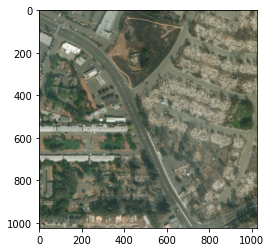

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
train_path = "./Data/FireDataset/train"
img_files = lstFiles(train_path, '.png')
img = mpimg.imread(img_files[0])
print(img_files[0])
plt.imshow(img)
plt.show()

In [0]:
traingeo_path = "./Data/FireDataset/train_geo"
gjsn_files = lstFiles(traingeo_path, '.geojson')
shp_files = lstFiles(traingeo_path, '.shp')

./Data/FireDataset/train_geo/santa-rosa-wildfire/00000007/santa-rosa-wildfire_00000007_post_disaster.geojson


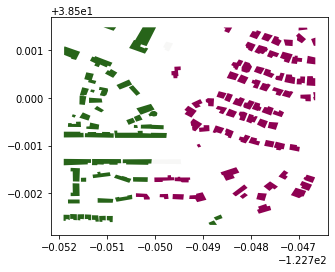

In [0]:
print(gjsn_files[12])
gjson_sample = gpd.read_file(gjsn_files[12])
gjson_sample.plot(column='damage', cmap='PiYG')

In [0]:
# visualize merged all test/train dataset
merged_path = "./Data/FireDataset/merged_shp"
merged_files = lstFiles(merged_path, '.shp')

  properties  ...                                           geometry
0   building  ...  POLYGON ((-122.77285 38.49540, -122.77284 38.4...
1   building  ...  POLYGON ((-122.77291 38.49545, -122.77290 38.4...
2   building  ...  POLYGON ((-122.77276 38.49551, -122.77276 38.4...
3   building  ...  POLYGON ((-122.77287 38.49505, -122.77287 38.4...
4   building  ...  POLYGON ((-122.77444 38.49602, -122.77444 38.4...

[5 rows x 10 columns]


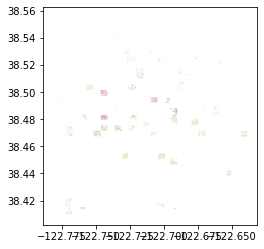

In [0]:
gdf = gpd.read_file(merged_files[0])
santaRosa = gdf[(gdf['location_n'] == 'santa-rosa-wildfire') & (gdf['pre_post_d'] == 'post')]
santaRosa.plot(column='damage', cmap='PiYG')
print(santaRosa.head())

     properties  ...                                           geometry
8452   building  ...  POLYGON ((-118.89596 34.14281, -118.89596 34.1...
8453   building  ...  POLYGON ((-118.89619 34.14214, -118.89618 34.1...
8454   building  ...  POLYGON ((-118.89578 34.14191, -118.89573 34.1...
8455   building  ...  POLYGON ((-118.89531 34.14180, -118.89525 34.1...
8456   building  ...  POLYGON ((-118.89579 34.14134, -118.89578 34.1...

[5 rows x 10 columns]


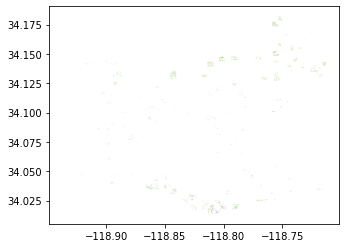

In [0]:
socal = gdf[(gdf['location_n'] == 'socal-fire') & (gdf['pre_post_d'] == 'post')]
socal.plot(column='damage', cmap='PiYG')
print(socal.head())